## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from Funtion_model import *



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load data

In [2]:
data1 = pd.read_csv('/Users/yuriawano/fetal_health_classification/data/fetal_health_modeling.csv')
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,37.264136,-1.698371,7.49855,-0.229605,15.008226,1.339407,0.752864,53149.942412,4.672702,B
1,77.866926,-1.833548,-3.904537,-1.363542,-1.694483,10.777798,-1.698371,7.49855,-0.229605,22.632791,1.339612,2.228554,53149.942412,2.610067,A
2,78.384675,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,22.632791,1.339612,1.956520,53149.942412,2.698445,A
3,78.901899,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,3.221597,53149.942412,2.698445,A
4,77.866926,-1.833548,-3.904537,-1.363542,-1.677820,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,2.877034,53149.942412,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.833548,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,11.309256,1.339612,1.639072,53149.942412,0.702658,B
2109,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.122632,B
2110,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,15.420003,1.339612,1.956520,53149.942412,1.424686,B
2111,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.424686,B


## Scaling the imbalance (smote)

In [3]:
X = data1.drop('fetal_health', axis =1)
y = data1['fetal_health']

In [4]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

C    1646
A    1646
B    1646
Name: fetal_health, dtype: int64

## Train the model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [6]:
# Check if train set and test set were saved in the variable correctly
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3950, 14), (988, 14), (3950,), (988,))

In [7]:
X_train

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance
2231,84.046254,-1.833548,-3.904537,-1.363542,-1.677820,38.486087,-1.698371,7.498550,-0.229605,4.768987,1.339612,0.752864,53149.942412,3.219352
1115,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,17.176216,-1.698371,7.498550,-0.229605,8.634123,1.339612,0.000000,53149.942412,0.000000
4623,78.901899,-1.833548,-3.904537,-1.363542,-1.717234,33.211204,-1.698371,7.498550,-0.229605,21.572468,1.339612,2.652878,53149.942412,5.198016
1945,78.384675,-1.850304,-3.904537,-1.363542,-1.694483,32.118398,-1.698371,7.498550,-0.229605,22.830305,1.339612,2.467835,53149.942412,5.139756
1545,83.534038,-1.833548,-3.904537,-1.363542,-1.707812,13.528059,-1.698371,7.498550,-0.229605,17.725889,1.339612,1.956520,53149.942412,3.599847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,77.154275,-1.833548,-3.904537,-1.363542,-1.677820,40.185993,-1.698371,7.498550,-0.229605,11.469255,1.339612,0.783964,53149.942412,3.817464
466,87.109619,-1.833548,-3.904537,-1.363542,-1.677820,41.011187,-1.698371,7.498550,-0.229605,5.117401,1.339612,1.738371,53149.942412,0.000000
3092,76.731028,-1.833548,-3.904537,-1.363542,-1.677820,30.904718,-1.698371,6.448055,-0.229605,13.554861,1.339612,1.565741,53149.942412,1.287312
3772,73.182838,-1.833548,-3.904537,-1.363542,-1.677820,37.469893,-1.698371,7.498550,-0.229605,4.132874,1.339612,0.752864,53149.942412,3.219352


## Scaling the numericals (StandardScaler)

In [8]:
# Apply Standard scaler to the train set and test set
transformer = StandardScaler().fit(X_train)
X_train = transformer.transform(X_train)

In [9]:
# Check if the transformer was applied to the test set correctly
X_train

array([[ 0.89441898,  0.28443098,  1.        , ..., -0.74805024,
         0.18756469,  0.37324501],
       [-1.31564932,  0.28443098,  1.        , ..., -1.52636948,
         0.18756469, -1.59620595],
       [-0.10406255,  0.28443098,  1.        , ...,  1.21620741,
         0.18756469,  1.58370019],
       ...,
       [-0.52541263,  0.28443098,  1.        , ...,  0.09231164,
         0.18756469, -0.80868777],
       [-1.21409029,  0.28443098,  1.        , ..., -0.74805024,
         0.18756469,  0.37324501],
       [ 0.09641445,  0.28443098,  1.        , ..., -0.74805024,
         0.18756469, -0.9094315 ]])

In [10]:
transformer = StandardScaler().fit(X_test)
X_test = transformer.transform(X_test)


In [11]:
# Check if the transformer was applied to the test set correctly
X_test

array([[-0.00496781, -3.90329625,  1.        , ...,  0.20028142,
         0.19841256, -0.47815277],
       [-0.48844842,  0.10520183,  1.        , ...,  1.27793417,
         0.19841256,  1.31997671],
       [ 0.48967899,  0.29710328,  1.        , ...,  2.01176988,
         0.19841256,  0.61672167],
       ...,
       [-0.50208929,  0.29710328,  1.        , ...,  0.53133135,
         0.19841256, -0.07390215],
       [ 1.44142511,  0.29710328,  1.        , ..., -0.78697289,
         0.19841256, -0.47619509],
       [ 1.06277101,  0.29710328,  1.        , ...,  0.20028142,
         0.19841256, -1.61843214]])

## Model evaluation of upsampling metrix
+ Here we will test on Logistic Regression, KNN and Random Forest
+ Using functions from .py file

### Logistic regression

1) Logistic regression score: 0.7267206477732794
2) Confustion metrix:
[[237  58  28]
 [ 49 225  39]
 [ 29  67 256]]
3) Confustion metrix plot: see bottom plot
AxesSubplot(0.125,0.125;0.62x0.755)
4) Classification report:
              precision    recall  f1-score   support

           A       0.75      0.73      0.74       323
           B       0.64      0.72      0.68       313
           C       0.79      0.73      0.76       352

    accuracy                           0.73       988
   macro avg       0.73      0.73      0.73       988
weighted avg       0.73      0.73      0.73       988



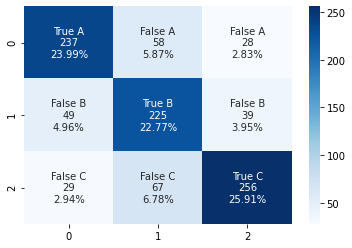

In [12]:
logistic_regression(X_train, y_train, X_test, y_test)

### KNN-Algorithm

#### Hyperparatemer: find the perfect K value

In [13]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.9392712550607287,
 0.9119433198380567,
 0.8927125506072875,
 0.8896761133603239,
 0.8876518218623481,
 0.8846153846153846,
 0.8775303643724697,
 0.8643724696356275,
 0.8532388663967612,
 0.8491902834008097]

Text(0, 0.5, 'Accuracy')

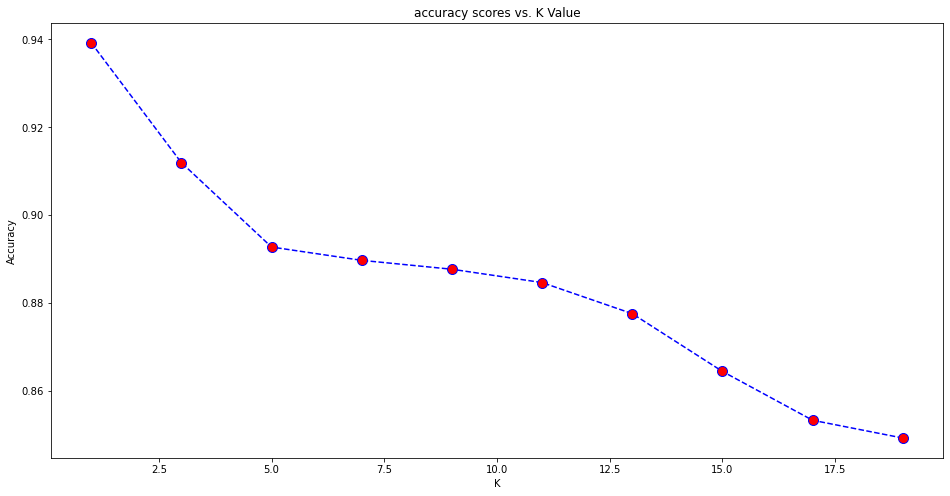

In [14]:
plt.figure(figsize=(16,8))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

#### Apply into KNN model
Use funtion from .py file

In [15]:
knn_classifier(X_train, y_train, X_test, y_test, 10)

1) KNN Classifier accuracy score:
0.888663967611336
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.89      0.84      0.87       323
           B       0.83      0.89      0.86       313
           C       0.95      0.93      0.94       352

    accuracy                           0.89       988
   macro avg       0.89      0.89      0.89       988
weighted avg       0.89      0.89      0.89       988



### Random Forest
Using funtion from .py file

In [16]:
random_forest(X_train, y_train, X_test, y_test)

1) Random forest accuracy score: 0.8340080971659919
